## Police Killings
The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.
### Assignment
Import the data and examine the head and columns

In [75]:
import pandas as pd

data = pd.read_csv('Data/police_killings.csv', sep=',', encoding='latin-1')
data.head() # examine head

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [215]:
data.columns #look at columns
# or list(data) 

['name',
 'age',
 'gender',
 'raceethnicity',
 'month',
 'day',
 'year',
 'streetaddress',
 'city',
 'state',
 'latitude',
 'longitude',
 'state_fp',
 'county_fp',
 'tract_ce',
 'geo_id',
 'county_id',
 'namelsad',
 'lawenforcementagency',
 'cause',
 'armed',
 'pop',
 'share_white',
 'share_black',
 'share_hispanic',
 'p_income',
 'h_income',
 'county_income',
 'comp_income',
 'county_bucket',
 'nat_bucket',
 'pov',
 'urate',
 'college']

#### Get the total counts for each racial grouping 

In [77]:
racedata = data['raceethnicity']
racecounts = pd.DataFrame(racedata.value_counts()) #Makes DataFrame of counts for each race
racecounts

,raceethnicity
White,236
Black,135
Hispanic/Latino,67
Unknown,15
Asian/Pacific Islander,10
Native American,4


#### Find the relative % for each racial grouping

In [49]:
total = racecounts.sum() #sum 
racepercents = (racecounts/total)*100
racepercents
racepercents

,raceethnicity
White,50.535332
Black,28.907923
Hispanic/Latino,14.346895
Unknown,3.211991
Asian/Pacific Islander,2.141328
Native American,0.856531


#### How do the killings compare with the overall US breakdown of population by race?

According to 2010 Census data: 
Black people are overrrepresented in police killings, 
since they comprise 12.6% of the population, 
but constitute over 28% of police killings. #Blacklivesmatter
White and Asian people are underrepresented in the police killings statistics.  
The frequency which Native Americans are killed by police is about equal to their proportion
of the population.

### Assignment
Graph the killings by race using a bar chart. Make sure to label the graph and axes


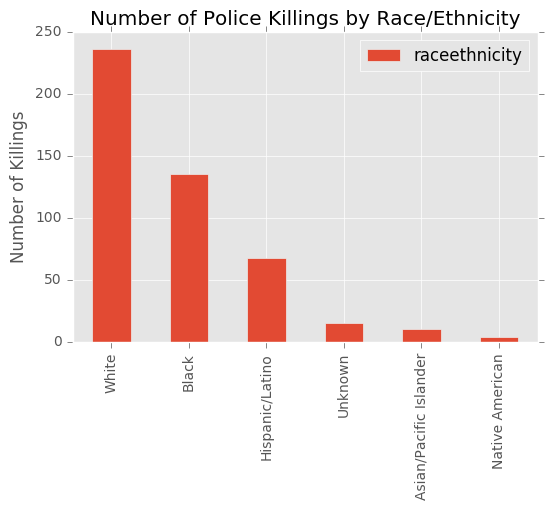

In [106]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

racecounts=racecounts[:].T

plt.figure();
barplot = racecounts.plot.bar()
barplot.set_ylabel('Number of Killings')
barplot.set_title('Number of Police Killings by Race/Ethnicity')
plt.show()

Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
Calculate the median "p_income"

In [162]:
income = pd.DataFrame(data['p_income']) 
income=income.ix[~(income['p_income']=="-")] #re-assigns Dataframe to all values that are not "-"
income.median()

p_income    22348.0
dtype: float64

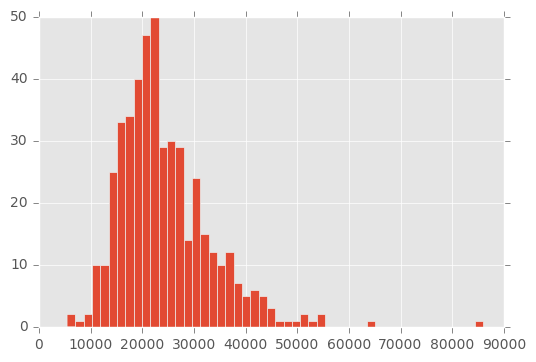

In [174]:
income['p_income'] = income['p_income'].apply(pd.to_numeric)
plt.close('all')
plt.figure();
income['p_income'].hist(bins=50)
plt.show()

### Assignment
Find the total killings per each state


In [175]:
statedata = data['state']
statecounts = pd.DataFrame(statedata.value_counts())
statecounts

,state
CA,74
TX,46
FL,29
AZ,25
OK,22
GA,16
NY,14
CO,12
NJ,11
LA,11


Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic"
Convert the values in those columns to float types
Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [212]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
df = data[
    (data['share_white']!= '-') & 
    (data['share_black']!= '-') &
    (data['share_hispanic']!= '-')
]
lowstates = df[df['state'].isin(lowest_states)]
highstates = df[df['state'].isin(highest_states)]
columns = ['pop','county_income','share_white','share_black','share_hispanic']
lowstates[columns].astype(float).mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [211]:
highstates[columns].astype(float).mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64